<a href="https://colab.research.google.com/github/Namesakenberg/Hyperparameter-Hangout/blob/main/Questions_on_stats_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Insurance Dataset : https://docs.google.com/spreadsheets/d/1dAc3E4U-gBzihJ6HLM2kYVDAqQthdReg20zwwaplTW8/edit?usp=share_link

In [ ]:
df = pd.read_csv('/content/insurance_data.csv')

In [ ]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [ ]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [ ]:
df.isnull().sum()

,0
index,0
PatientID,0
age,5
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,3


In [ ]:
# replace the null values in the age column by the mean
df['age']=df['age'].fillna(df['age'].mean())

### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method

<Axes: xlabel='age', ylabel='Density'>

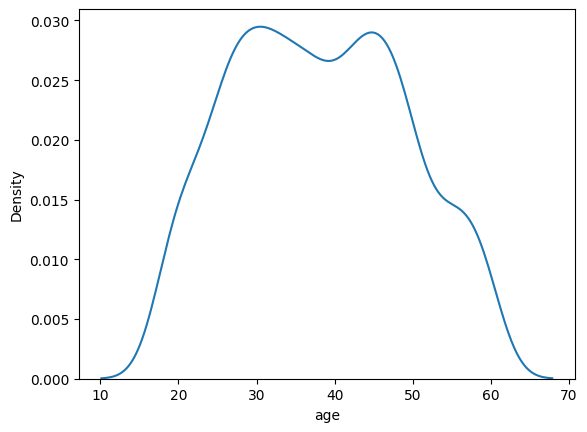

In [ ]:
# code here
sns.kdeplot(df['age'])

### Q-2: What is the probability of a patient having a BMI greater than 30?

<Axes: xlabel='bmi', ylabel='Density'>

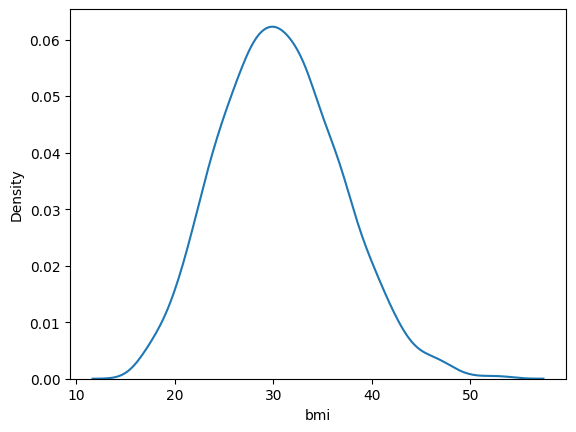

In [ ]:
# answer here
# plot the distribution of the bmi
sns.kdeplot(df['bmi'])

In [ ]:
# to get the area under the normal distribution use the z score method
# z score = datapoint - mean / std dev

In [ ]:
df['bmi'].describe()

,bmi
count,1340.000000
mean,30.668955
std,6.106735
min,16.000000
25%,26.275000
50%,30.400000
75%,34.700000
max,53.100000


In [ ]:
mean = df['bmi'].mean()
stddev = df['bmi'].std()

In [ ]:
zscore  = (30-mean)/stddev
print(zscore)

-0.10954384780437046


In [ ]:
from scipy.stats import norm
area =1 - norm.cdf(zscore)
print(area)

0.5436144272589527


ans  = 54%

### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

<Axes: xlabel='claim', ylabel='Count'>

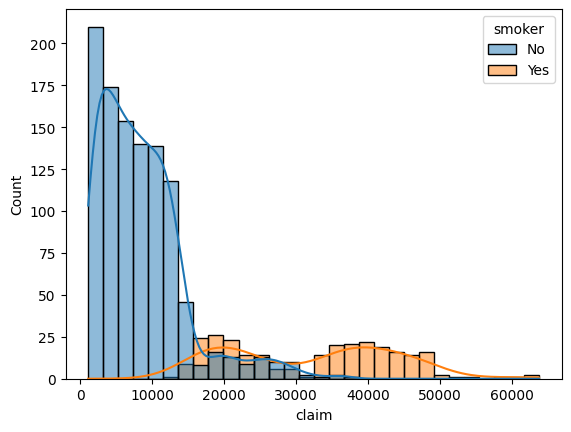

In [ ]:
# code here
sns.histplot(df,x='claim',kde=True,hue='smoker')

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

<Axes: xlabel='age', ylabel='claim'>

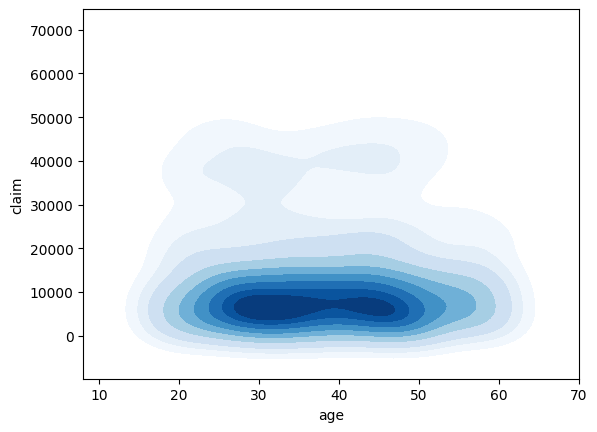

In [ ]:
# code here
sns.kdeplot(df,x='age',y='claim',cmap="Blues",fill=True)

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

<Axes: xlabel='claim', ylabel='Density'>

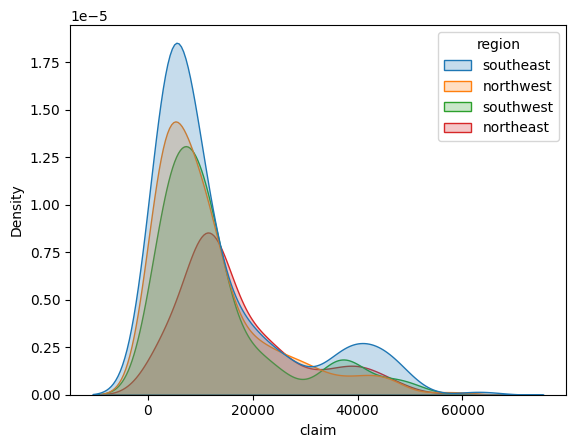

In [ ]:
# code here
sns.kdeplot(df,x='claim',hue='region',fill=True)
# observations :

In [ ]:
# all graphs are right skewed hence most of the claims are made before 35000
# except the northeast region all the regions have the claim's peak in the same region

### Q6: Plot PDF and CDF of claim in insurance data

<Axes: xlabel='claim', ylabel='Density'>

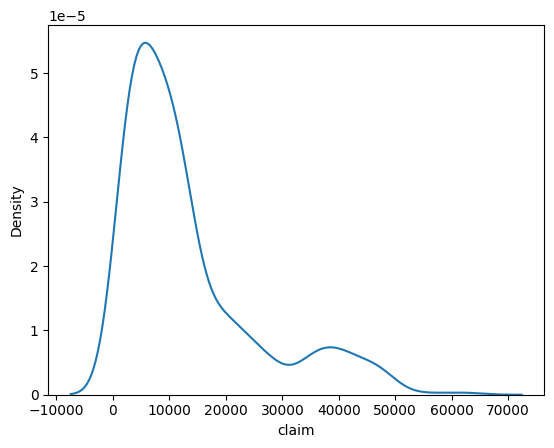

In [ ]:
# code here
# pdf
sns.kdeplot(df['claim'])

<Axes: xlabel='claim', ylabel='Density'>

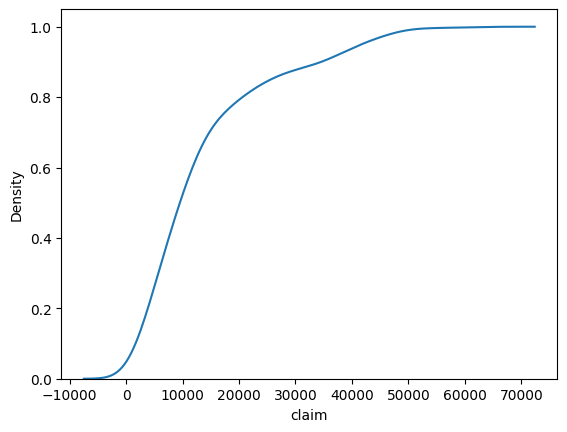

In [ ]:
sns.kdeplot(df['claim'],cumulative=True)

### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

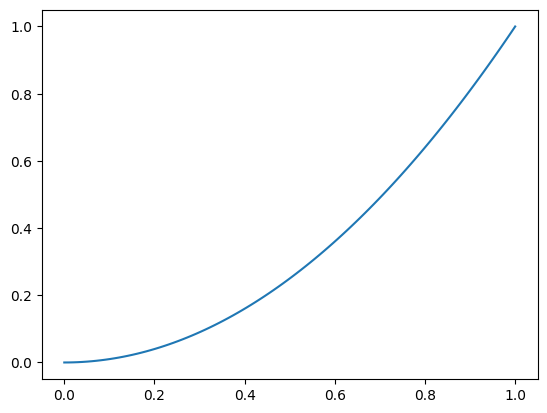

In [ ]:
# code here

# function to find pdf
def pdf(x):
  if 0<=x<=1:
    return 2*x
  return 0

# function to find cdf
def cdf(x):
  if x<0:
    return 0
  elif x>1:
    return 1
  return x**2

# generate points in x
points = (np.linspace(0, 1, num=100))

#find cdf
points_cdf = np.array([cdf(point) for point in points])
# plot cdf
plt.plot(points,points_cdf)

In [ ]:
ans  = 1-(cdf(0.5))
print("he probability that X is greater than 0.5 is",ans)

he probability that X is greater than 0.5 is 0.75


### Q-8: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

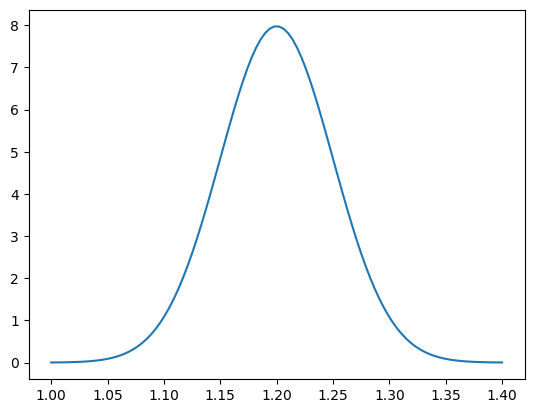

In [ ]:
# answer here
mean = 1.2
stddev = 0.05
dist=stats.norm(mean,stddev)
samples =np.linspace(mean-4*stddev,mean+4*stddev,100)
pdf_val = dist.pdf(samples)
plt.plot(samples,pdf_val)

In [65]:
ans = dist.cdf(1.3)-dist.cdf(1.1)
ans

0.9544997361036416

### Q-9 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

In [ ]:
# answer here
h = 1.06 * 10 * (100**(-1/5))
print("Scott rule bandwidth:", h)

Scott rule bandwidth: 4.219936007867071
